In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_png
%matplotlib inline

In [2]:
df = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1 = df.copy()

def preprocessing1(df):
    # Name, Ticket, Cabin列の削除
    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

    # Sex列の変換 male:0 female: 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Age, Fare列のNaNを平均値で補完
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

    # Embarked列をOne-hotエンコード
    df_embarked = pd.get_dummies(df['Embarked'])
    df_embarked = df_embarked.rename(columns={'C': 'Em_C', 'Q': 'Em_Q', 'S': 'Em_S'})

    df.drop(['Embarked'], axis=1, inplace=True)
    df = pd.concat([df, df_embarked], axis=1)
    return df

In [4]:
df1 = preprocessing1(df1)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [5]:
X1_train = df1.iloc[:, 2:].values
y1_train = df1.iloc[:, 1].values
X1_train[:5, :]

array([[ 3.    ,  0.    , 22.    ,  1.    ,  0.    ,  7.25  ,  0.    ,
         0.    ,  1.    ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833,  1.    ,
         0.    ,  0.    ],
       [ 3.    ,  1.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,
         0.    ,  1.    ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,
         0.    ,  1.    ],
       [ 3.    ,  0.    , 35.    ,  0.    ,  0.    ,  8.05  ,  0.    ,
         0.    ,  1.    ]])

In [6]:
X1_train.shape, y1_train.shape

((891, 9), (891,))

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X1_train, y1_train)
lr.score(X1_train, y1_train)

0.8013468013468014

In [8]:
df_test1 = df_test.copy()
df_test1 = preprocessing1(df_test1)
df_test1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Em_C,Em_Q,Em_S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


In [9]:
predictions = lr.predict(df_test1.iloc[:, 1:].values)
predictions.shape

(418,)

In [10]:
df_out = df_test.copy()
df_out['Survived'] = predictions

df_out[['PassengerId', 'Survived']].to_csv('./output/submission1.csv',index=False)

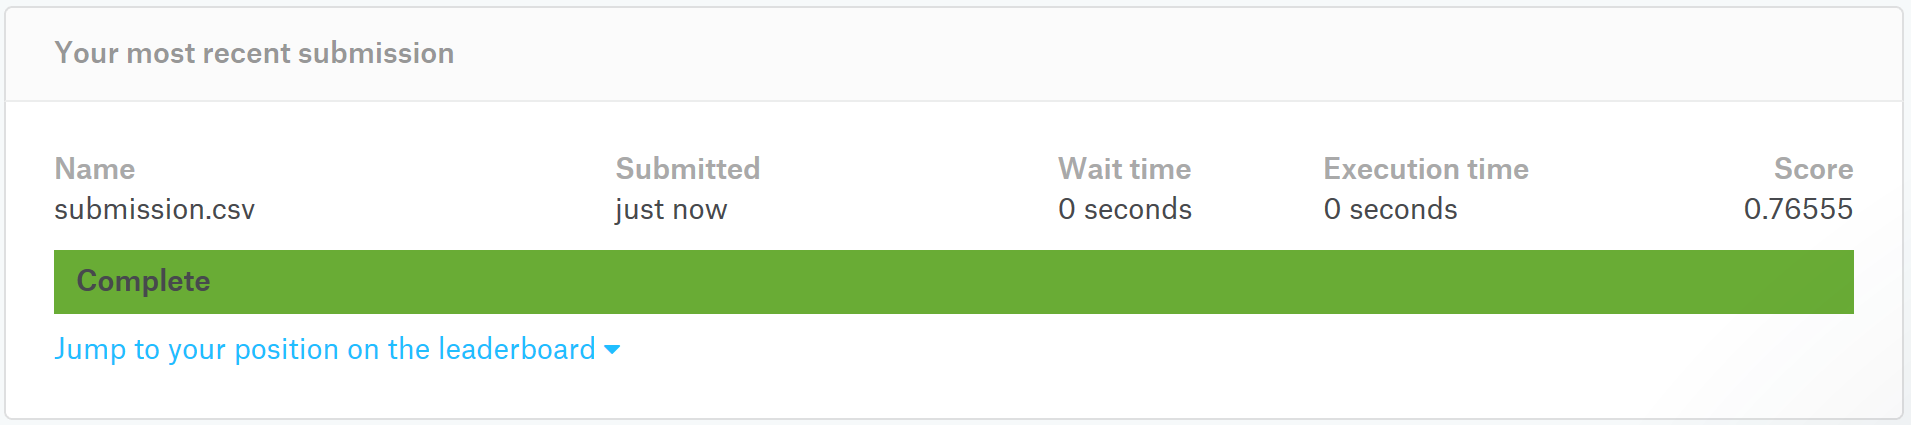

In [11]:
display_png(Image('./output/score1.png'))